## What is hierarchical clustering?

Hierarchical clustering is a hard clustering technique that aims to build a tree-like hierarchy of clusters within the data. This tree-like hierarchical representation of the clusters is called a **dendrogram**. You can see a dendrogram in the right chart of the figure above. 

In general, there are two types of hierarchical clustering approaches:

1. **Bottom-up approach**: Also called **agglomerative clustering**, this approach starts with the individual observations as stand-alone clusters. Then,
    * It combines the two most similar clusters into one, hence decreasing the total number of clusters by one.
    * It repeats the previous step above until only a single cluster remains. The figure above illustrates this approach.
    
2. **Top-down approach**: Also called **divisive clustering**, this approach starts with a single cluster. Then,
    * It uses a parametric clustering algorithm like k-means to divide the cluster into two clusters. 
    * It repeats the step above for every subcluster until all observations are clustered as stand-alone clusters.

In the rest of this checkpoint, we'll focus on agglomerative clustering. Notice that with the agglomerative clustering algorithm, we need to determine the **two most similar clusters** at each step. Let's discuss how we can do this:


# Similarity metrics in hierarchical clustering

Throughout the bootcamp, we have come across several metrics that measure the distance between high-dimensional observations. For example, when discussing linear regression and the ordinary least squares (OLS) method, as a loss function we used the *sum of the squared of the errors*, which is essentially the Euclidean or L2 distance. In hierarchical clustering, we use similar distance metrics. The three most common metrics are:

* **Euclidean distance**: This is also known as **L2** distance. We also used this metric to measure similarity in the k-means algorithm.
* **Manhattan distance**: This is also known as **L1** distance. We used this metric as a regularization term in the Lasso regression.
* **Cosine distance**: This is another metric that is commonly used in machine learning. We'll not go into details of it but it would be a good choice if we have too many variables and some are insignificant. Cosine distance takes into account the shape of the variables more than their values. It tends to associate observations that have the same maximum and minimum variables regardless of their values.

Apart from the metric we use to measure similarity between clusters, we also need to decide how to select the representative elements of the clusters when calculating the similarities. To this end, we present three different techniques which are called **linkage methods**:

# Linkage methods

* **Ward**: The Ward method tends to look for spherical clusters such that the clusters are cohesive inside and differentiated from other groups. In general, this method tends to find clusters of similar size. Note that the Ward method only works with Euclidean distance.
* **Complete**: The Complete method links clusters using their furthest observations, that is, their most dissimilar data points. Consequently, clusters created using this method tend to be comprised of highly similar observations, making the resulting groups quite compact.
* **Average**: The Average method links clusters using their centroids. Since this method focuses on centroids and ignoring the boundary points, it tends to create larger groups than the complete method. Moreover, the clusters can be different sizes and shapes in contrast to the Ward method.

# Speed

The run-time complexity of divisive clustering depends on the clustering technique used in the first step. Since we focused on agglomerative clustering in this checkpoint, let's analyze its complexity in more detail. In agglomerative clustering, we perform n iterations and in each iteration we need to calculate (or update) the similarities between the n clusters. So updating similarities takes $n^2$ operations and we do this for each iteration, which in turn makes the time complexity of the agglomerative clustering $O(n^3)$. If the number of observations is too high, then the time to run agglomerative clustering will be too long to be practical.

When we have too many observations, we can consider using PCA to reduce dimensionality before applying hierarchical clustering.

# Agglomerative clustering in action

Now, it's time to implement agglomerative clustering. We'll demonstrate it on the Iris dataset from the earlier checkpoint.

Although you can find the dataset [on the internet](https://archive.ics.uci.edu/ml/datasets/iris), we'll load it using scikit-learn's `datasets` module. To this purpose, we import the module `from sklearn import datasets` and then load the dataset `iris = datasets.load_iris()`:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

After loading the dataset, we standardize our features as most of the clustering algorithms are sensitive to the scales of the variables. 

**Note**: Clustering algorithms are sensitive to the variable scale of the metrics that are used to analyze similarity. For example, the L2 norm (Euclidean distance), which is a common measure of similarity, is sensitive to variable scale. Similarly, the cosine distance that we'll use in the following implementation of the agglomerative clustering is also sensitive to the mean and hence the scale of the variables. For more information, see [this post on Stackoverflow](https://stats.stackexchange.com/questions/292596/is-feature-normalisation-needed-prior-to-computing-cosine-distance).

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

We use the `AgglomerativeClustering` class from scikit-learn's clustering module. We imported it before as `from sklearn.cluster import AgglomerativeClustering`. Note that, in scikit-learn's jargon, the *affinity* parameter for `AgglomerativeClustering` refers to the similarity metric we discussed before. Moreover, the *n_clusters* parameter denotes the number of clusters we want, which is equivalent to cutting the dendrogram from the respective height. **But don't get confused as agglomerative clustering doesn't require you to specify the number of clusters beforehand. Scikit-learn's implementation uses this parameter just to determine when to stop. So, scikit-learn's implementation of the agglomerative clustering will stop and return the clusters when the specified `n_clusters` value is reached.

We use the *complete* method for linkage and *cosine* for measuring the similarities of the clusters. We also set the `n_clusters=3` as the Iris dataset includes three species. You can play with the other methods and values and compare their results with each other.

In [3]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

Below, we sketch the clusters assigned by agglomerative clustering. To be able to do that, we apply PCA to the four features we have and use the first two principal components.

In the plot below, the numbers show the cluster each observation has been assigned to by the algorithm. The colors denote the true classes.

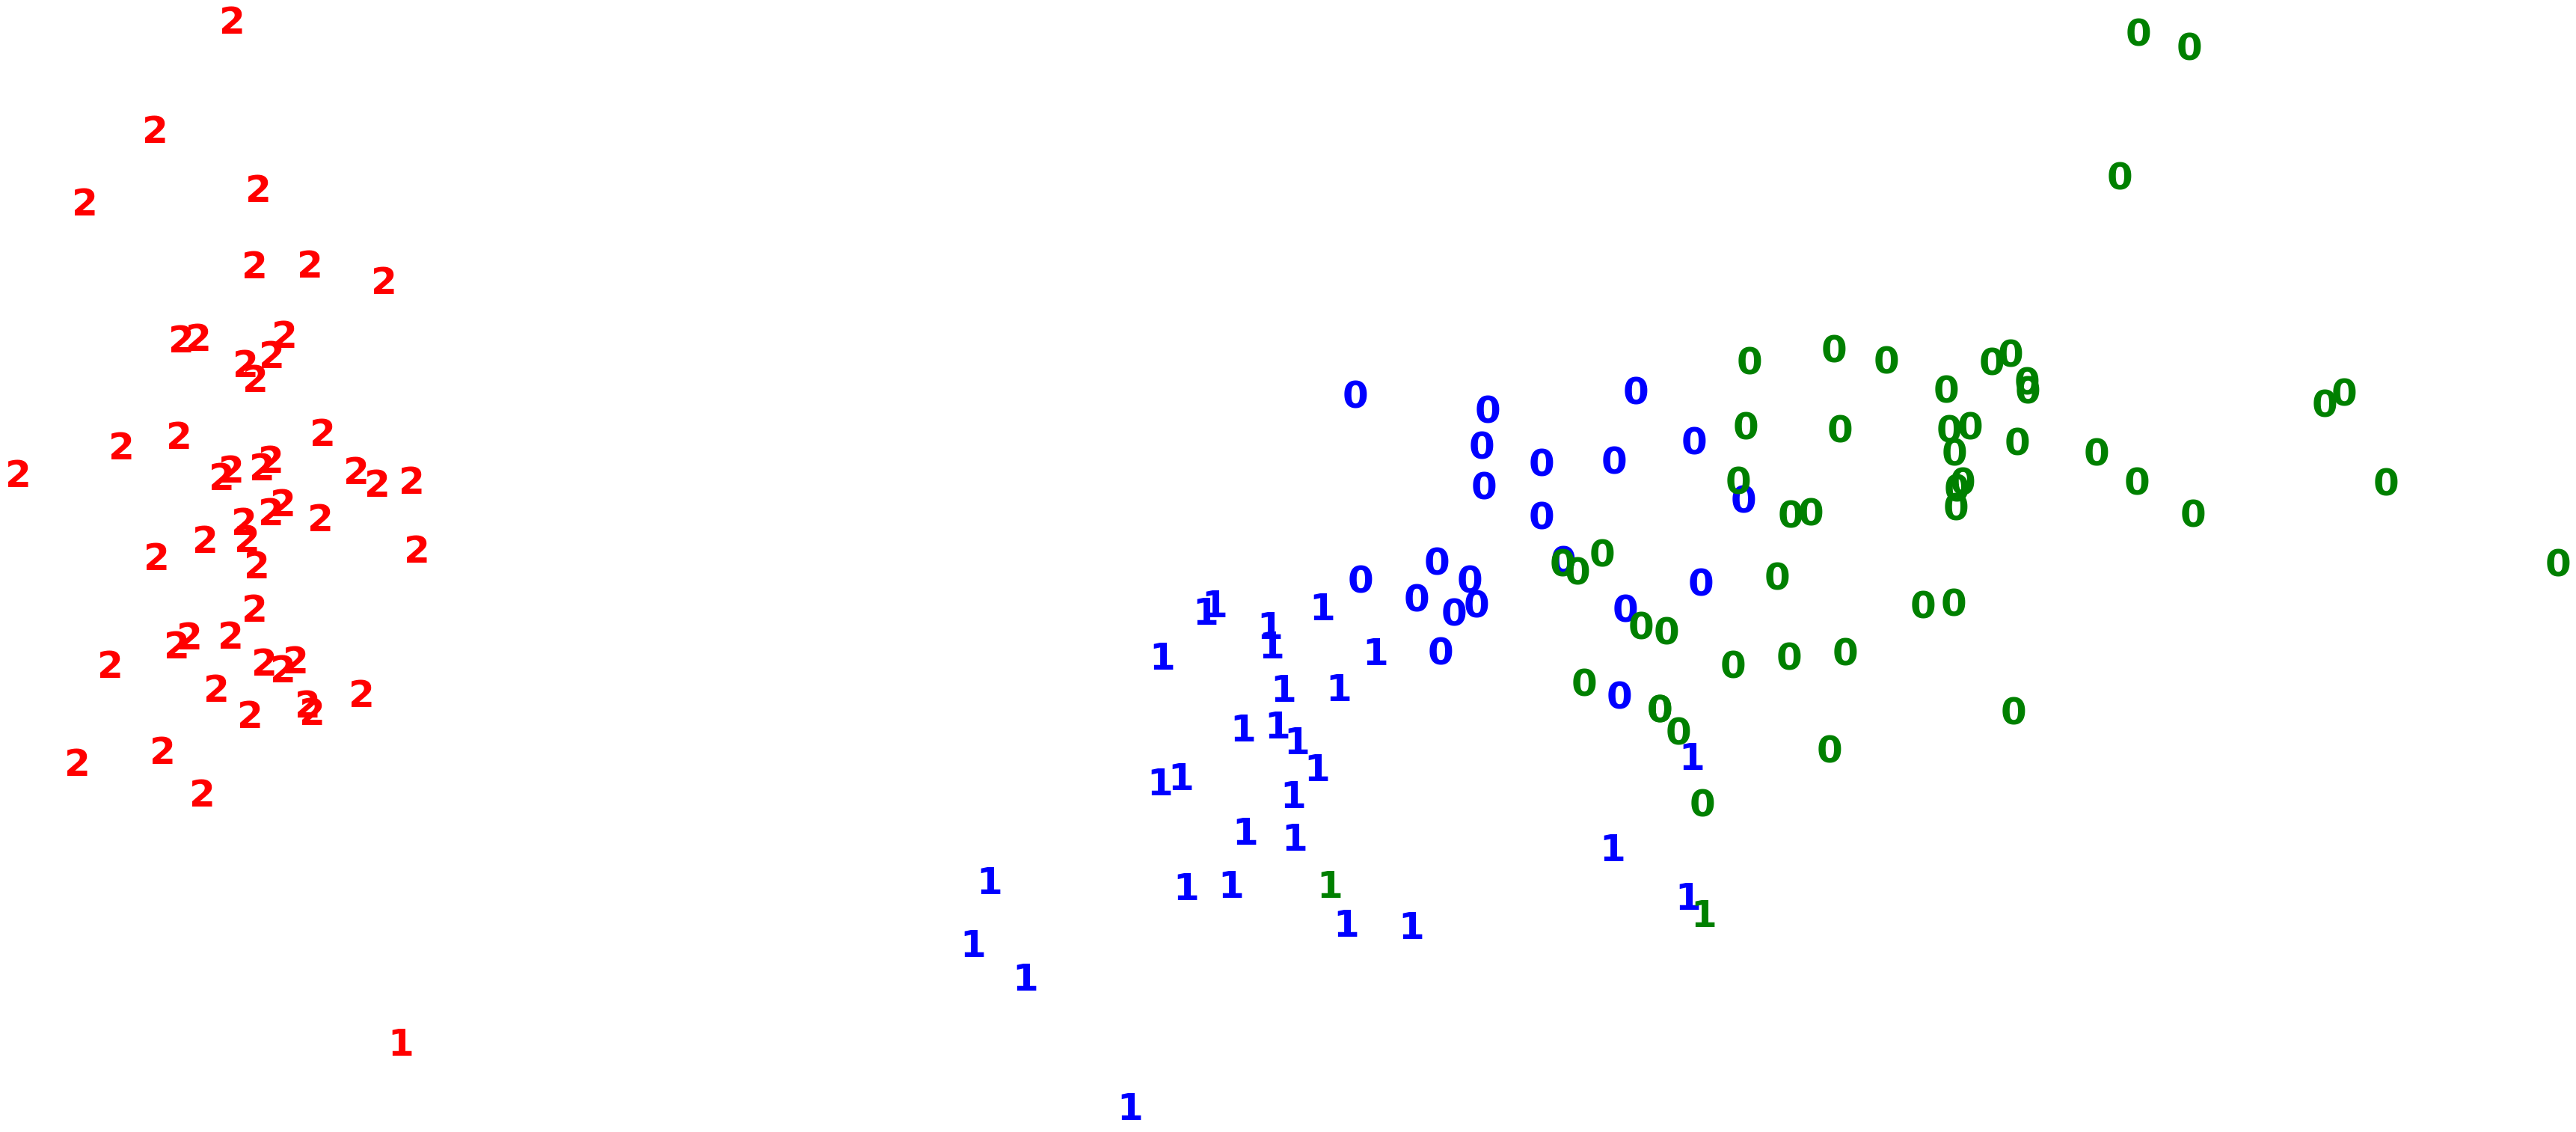

In [4]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Let's get the Adjusted Rand Index (ARI) and the silhouette scores for the agglomerative clustering approach and compare them with the results for k-means from the previous checkpoint:

In [5]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.6334862915668319
The silhoutte score of the Agglomerative Clustering solution: 0.44662483949372017


The ARI score for the agglomerative clustering approach is 0.63 and slightly higher than the one for k-means, which was 0.62. However, the silhouette score of the algorithm is 0.45, which is slightly lower than that of the k-means which was 0.46. Overall, the comparison is not very decisive and both algorithms achieve more or less the same performance.

To close things out, here's a demonstration of how we can implement agglomerative clustering and generate a dendrogram using SciPy. For this purpose, we imported `from scipy.cluster.hierarchy import dendrogram, linkage` before. Below, we sketch the dendrogram using the *complete* linkage method.

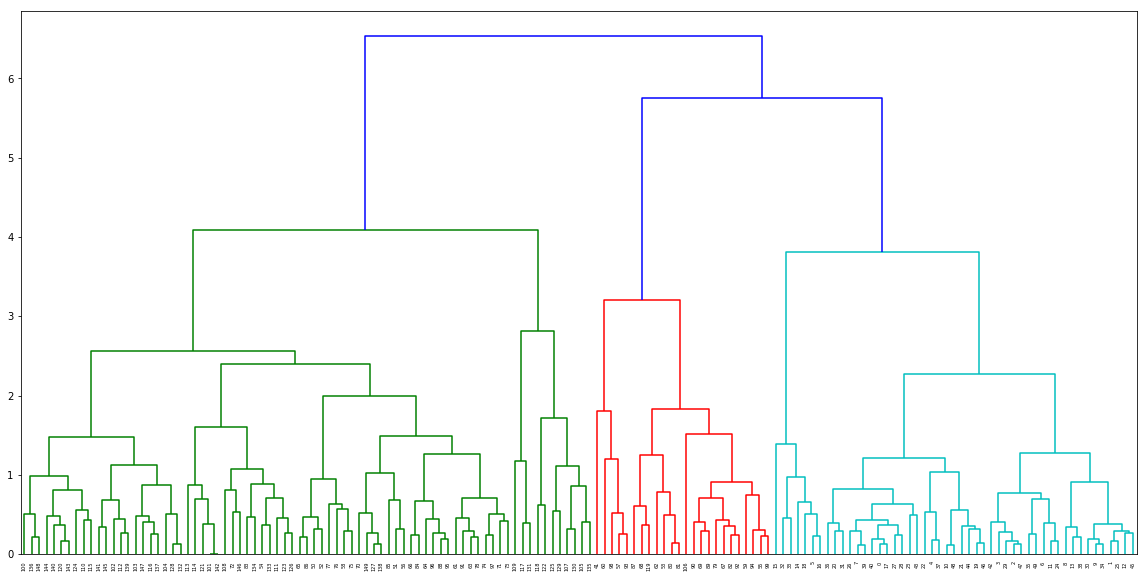

In [6]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

By investigating this dendrogram, you can try to choose the number of clusters that match most to your needs.